In [1]:
import time
start_time = time.time()

In [2]:
import pandas as pd
import numpy as np
from copy import *

In [3]:
a,b,c,d,e,f,g,h = np.loadtxt('C:/Users/cshi/OneDrive - University of Connecticut/2019-20_Fall/First_Year_Project/Random Forest/WineQualityRed/FindMaxClique/BuildGraphInstances/RandomForestsInstances/S12.txt', skiprows = 1, unpack = True)

In [4]:
SplitIndex = a.astype('int')
TreeIndex = b.astype('int')
LeafIndex = c.astype('int')
LeafValue = d.astype('float')
SplitFeature = e.astype('int')
SplitSign = f.astype('int')
SplitCriterion = g.astype('float')
SplitNodeIndex = h.astype('int')

In [5]:
SplitData = np.array([SplitIndex, TreeIndex, LeafIndex, LeafValue, SplitFeature, SplitSign, SplitCriterion, SplitNodeIndex], dtype = object)

In [6]:
SplitData.shape

(8, 490734)

In [7]:
SplitData

array([[0, 1, 2, ..., 490731, 490732, 490733],
       [0, 0, 0, ..., 499, 499, 499],
       [0, 0, 0, ..., 123, 123, 123],
       ...,
       [0, 0, 0, ..., 1, 1, 1],
       [0.1232, 0.0924, 0.1093, ..., 0.4846, 0.1526, 0.3],
       [8, 7, 6, ..., 76, 44, 0]], dtype=object)

In [8]:
len(np.unique(SplitData[1])) #number of trees in the random forests
len(np.unique(np.where((SplitData[1] == 0)))) #number of split rules in tree_0
np.unique(SplitData[2][np.where((SplitData[1] == 0))]) #number of leaves of tree_0

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52,
       53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69,
       70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86,
       87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102,
       103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115,
       116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128,
       129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141,
       142, 143, 144, 145, 146, 147, 148, 149, 150], dtype=object)

In [9]:
x = np.where((SplitData[1] == 0) * (SplitData[2] == 1))
x[0]
#x[0]: generate Split Index for leaves, Leaf ID = (SplitData[1] == i) * (SplitData[2] == j), i: Tree Index, j: Leaf Index 
#len(x[0]) 
#Split Index of splits for that leaf

array([ 9, 10, 11, 12, 13, 14, 15, 16, 17], dtype=int64)

In [10]:
#function of checking whether two rules(intervals) have non-empty intersection
def Intersection(rule_a, rule_b):
    if rule_a[0] == rule_b[0]:
        if rule_a[1] == rule_b[1]:
            return True
        else:
            if rule_a[1] == 1:
                if rule_a[2] < rule_b[2]:
                    return True
                else:
                    return False
            else:
                if rule_a[2] > rule_b[2]:
                    return True
                else:
                    return False
    else:
        return True

In [11]:
#checking whether two sets of rules have non-empty intersection
def Consistency(rule_set_a, rule_set_b):
    while True:
        for a in rule_set_a:
            for b in rule_set_b:
                if Intersection(a, b) == True:
                    continue
                else:
                    return False
        return True

In [12]:
# Generate the main-graph:
# For each leaf node of the main tree, find all the leaf nodes from sibling trees that are consistent with that leaf node.
Main_TreeIndex = 0
Vertices_Main = {}
Edges_Main = {} # not necessary
for i in range(len(np.unique(SplitData[2][np.where((SplitData[1] == Main_TreeIndex))]))): # leaf nodes in the main tree
    Vertices_Main[i] = []
    Edges_Main[i] = []
    Vertices_Main[i].append([str('n'), Main_TreeIndex, i, SplitData[3][np.where((SplitData[1] == Main_TreeIndex) * (SplitData[2] == i))[0]][0]])
    
    #Split rules for leaf[0, i], SplitData[1] == 0, SplitData[2] == i
    leaf_split_feature = SplitData[4][np.where((SplitData[1] == Main_TreeIndex) * (SplitData[2] == i))[0]] # Split Feature
    leaf_split_sign = SplitData[5][np.where((SplitData[1] == Main_TreeIndex) * (SplitData[2] == i))[0]] # Split Sign
    leaf_split_criterion = SplitData[6][np.where((SplitData[1] == Main_TreeIndex) * (SplitData[2] == i))[0]] # Split Criterion
    Rules_Leaf_Main_Tree = np.transpose(np.array([leaf_split_feature, leaf_split_sign, leaf_split_criterion], dtype = object))
    #Go to sibling trees
    for j in range(1, len(np.unique(SplitData[1]))):
        for k in range(len(np.unique(SplitData[2][np.where((SplitData[1] == j))]))):
            leaf_split_feature = SplitData[4][np.where((SplitData[1] == j) * (SplitData[2] == k))[0]] # Split Feature
            leaf_split_sign = SplitData[5][np.where((SplitData[1] == j) * (SplitData[2] == k))[0]] # Split Sign
            leaf_split_criterion = SplitData[6][np.where((SplitData[1] == j) * (SplitData[2] == k))[0]] # Split Criterion
            Rules_Leaf_Sibling_Tree = np.transpose(np.array([leaf_split_feature, leaf_split_sign, leaf_split_criterion], dtype = object))
            if Consistency(Rules_Leaf_Main_Tree, Rules_Leaf_Sibling_Tree) == True:
                Vertices_Main[i].append([str('n'), j, k, SplitData[3][np.where((SplitData[1] == j) * (SplitData[2] == k))[0]][0]])
                Edges_Main[i].append([str('e'), Main_TreeIndex, i, j, k])

                

In [ ]:
# Generate sub-graphs:
# For each Vertice_Main[i], check consistency among the leaf nodes other than the leaf node from the main tree
Vertices_Sub = {}
Edges_Sub = {}
Main_graph = {}
for i in range(len(np.unique(SplitData[2][np.where((SplitData[1] == Main_TreeIndex))]))): # leaf nodes in the main tree
    Vertices_Sub[i] = copy(Vertices_Main[i])[1:] # sub graph for leaf 0 from the main tree, all the nodes from other trees that are connected with leaf 0 
    Edges_Sub[i] = []
    Main_graph[i] = np.array(Vertices_Main[i], dtype = object) # Transform generated vertices Vertices_Main from list to array
    LastTreeIndex = max(Main_graph[i][:, 1]) # 
    exclude_1 = [Main_TreeIndex, LastTreeIndex] # 0 is tree index of main tree, abort the loop when we finish checking the last but one tree
    exclude_2 = [Main_TreeIndex]
    for j in np.delete(np.unique(Main_graph[i][:, 1]), exclude_1): # Start from nodes that not from the main tree
        exclude_2.append(j)
        for k in Main_graph[i][np.where(Main_graph[i][:, 1] == j)][:, 2]:
            #Split rules for leaf[j, k], SplitData[1] == j, SplitData[2] == k
            leaf_split_feature = SplitData[4][np.where((SplitData[1] == j) * (SplitData[2] == k))[0]] # Split Feature
            leaf_split_sign = SplitData[5][np.where((SplitData[1] == j) * (SplitData[2] == k))[0]] # Split Sign
            leaf_split_criterion = SplitData[6][np.where((SplitData[1] == j) * (SplitData[2] == k))[0]] # Split Criterion
            Rules_Leaf_Sibling_1_Tree = np.transpose(np.array([leaf_split_feature, leaf_split_sign, leaf_split_criterion], dtype = object))
            # for nodes in Main_graph[0], whose tree index is > j
            for s in np.delete(np.unique(Main_graph[i][:, 1]), exclude_2):
                for t in Main_graph[i][np.where(Main_graph[i][:, 1] == s)][:, 2]:
                    #Split rules for leaf[s, t], SplitData[1] == s, SplitData[2] == t
                    leaf_split_feature = SplitData[4][np.where((SplitData[1] == s) * (SplitData[2] == t))[0]] # Split Feature
                    leaf_split_sign = SplitData[5][np.where((SplitData[1] == s) * (SplitData[2] == t))[0]] # Split Sign
                    leaf_split_criterion = SplitData[6][np.where((SplitData[1] == s) * (SplitData[2] == t))[0]] # Split Criterion
                    Rules_Leaf_Sibling_2_Tree = np.transpose(np.array([leaf_split_feature, leaf_split_sign, leaf_split_criterion], dtype = object))

                    if Consistency(Rules_Leaf_Sibling_1_Tree, Rules_Leaf_Sibling_2_Tree) == True:
                        Edges_Sub[i].append([str('e'), j, k, s, t])

In [ ]:
print("--- %s seconds ---" % (time.time() - start_time))

In [ ]:
Edges_Sub[7]

In [ ]:
Vertices_Sub[7]

In [ ]:
# #Split rules for leaf[i, j], SplitData[1] == i, SplitData[2] == j
# leaf_1_split_feature = SplitData[4][np.where((SplitData[1] == 0) * (SplitData[2] == 0))[0]] # Split Feature
# leaf_1_split_sign = SplitData[5][np.where((SplitData[1] == 0) * (SplitData[2] == 0))[0]] # Split Sign
# leaf_1_split_criterion = SplitData[6][np.where((SplitData[1] == 0) * (SplitData[2] == 0))[0]] # Split Criterion
# Rules_1 = np.transpose(np.array([leaf_1_split_feature, leaf_1_split_sign, leaf_1_split_criterion], dtype = object))
# Rules_1 # set of rules of leaf[0,0]

In [ ]:
#Split rules for leaf[i, j], SplitData[1] == i, SplitData[2] == j
# leaf_2_split_feature = SplitData[4][np.where((SplitData[1] == 1) * (SplitData[2] == 0))[0]] # Split Feature
# leaf_2_split_sign = SplitData[5][np.where((SplitData[1] == 1) * (SplitData[2] == 0))[0]] # Split Sign
# leaf_2_split_criterion = SplitData[6][np.where((SplitData[1] == 1) * (SplitData[2] == 0))[0]] # Split Criterion
# Rules_2 = np.transpose(np.array([leaf_2_split_feature, leaf_2_split_sign, leaf_2_split_criterion], dtype = object))
# Rules_2 # set of rules of leaf[1,0]

In [ ]:
# #Split rules for leaf[1, 1], SplitData[1] == 1, SplitData[2] == 1, consistency with leaf[0,0] should be False
# leaf_3_split_feature = SplitData[4][np.where((SplitData[1] == 1) * (SplitData[2] == 1))[0]] # Split Feature
# leaf_3_split_sign = SplitData[5][np.where((SplitData[1] == 1) * (SplitData[2] == 1))[0]] # Split Sign
# leaf_3_split_criterion = SplitData[6][np.where((SplitData[1] == 1) * (SplitData[2] == 1))[0]] # Split Criterion
# Rules_3 = np.transpose(np.array([leaf_3_split_feature, leaf_3_split_sign, leaf_3_split_criterion], dtype = object))
# Rules_3 # set of rules of leaf[1,0]

In [ ]:
# Consistency(Rules_1, Rules_2)

In [ ]:
# Consistency(Rules_1, Rules_3)

In [ ]:
# rule_test1 = np.array([1, 0, 0.5749], dtype=object)
# rule_test2 = np.array([9, 1, 0.675], dtype=object)
# Intersection(rule_test1, rule_test2)

# <span style='background :light yellow' > <span style='color:black'> <span style='font-family:Georgia'>Visualization of a Subgraph $&$ Writing node/edge info into txt file</span>

In [ ]:
import networkx as nx
import math
import matplotlib.pyplot as plt
from itertools import count

In [ ]:
Vertices_Sub[0]

In [ ]:
nodeoutput = np.array(Vertices_Sub[0])
edgeoutput = np.array(Edges_Sub[0])

In [ ]:
with open("Sub_Graph_Tree10_Depth9_Leaf0_0.a", 'w') as f:
    for item in nodeoutput:
        f.write(" ".join(item) + "\n")
    for item in edgeoutput:
        f.write(" ".join(item) + "\n")
f.close()

In [631]:
Vertices_Sub_0
#Edges_Sub_0

[['n', 1, 0, 5.5681],
 ['n', 1, 2, 5.4071],
 ['n', 1, 3, 4.7192],
 ['n', 2, 0, 5.1398],
 ['n', 2, 1, 3.0],
 ['n', 3, 0, 5.1404],
 ['n', 3, 1, 5.4795],
 ['n', 4, 0, 5.1884],
 ['n', 4, 1, 4.3043],
 ['n', 5, 0, 5.1636],
 ['n', 5, 1, 3.3333],
 ['n', 6, 0, 5.8909],
 ['n', 6, 2, 4.9407],
 ['n', 6, 3, 5.3248],
 ['n', 7, 0, 6.025],
 ['n', 7, 1, 7.2857],
 ['n', 7, 2, 5.1259],
 ['n', 7, 3, 5.4642],
 ['n', 8, 0, 5.2767],
 ['n', 8, 1, 4.3913],
 ['n', 9, 0, 5.1645],
 ['n', 9, 1, 4.3333]]

In [748]:
Edges = copy(Edges_Sub[0])
Nodes = copy(Vertices_Sub[0])
Nodeslist = [str(Nodes[i][1]) + ',' + str(Nodes[i][2]) for i in range(len(Nodes))]
Edgeslist = [(str(Edges[i][1]) + ',' + str(Edges[i][2]), str(Edges[i][3]) + ',' + str(Edges[i][4])) for i in range(len(Edges))]
Edgeslist
Nodeslist
print (len(Edgeslist))
print (len(Nodeslist))

175
22


In [633]:
print("--- %s seconds ---" % (time.time() - start_time))

--- 0.5076489448547363 seconds ---


In [1039]:
trees = set(np.array(Vertices_Sub_0, dtype = object)[:,1])
trees

{1, 2, 3, 4, 5, 6, 7, 8, 9}

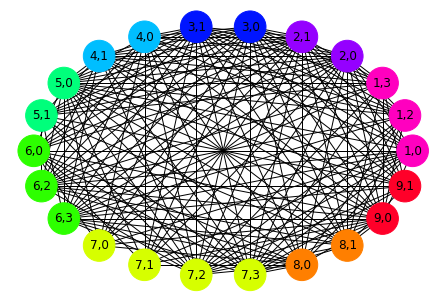

In [765]:
G = nx.Graph()
G.add_nodes_from(Nodeslist)
G.add_edges_from(Edgeslist)

val_map = {'1': 2.0,
           '2': 1.8,
           '3': 1.6,
           '4': 1.4,
           '5': 1.2,
           '6': 1.0,
           '7': 0.8,
           '8': 0.6,
           '9': 0.4,}

values = [val_map.get(node[0], 0) for node in G.nodes()] # set of trees index

pos = nx.circular_layout(G)   # replaces your original pos=...
# prep center points (along circle perimeter) for the clusters
angs = np.linspace(0, 2*np.pi, 10)
repos = []
rad = 5    # radius of circle
for ea in angs:
    if ea > 0:
        #print(rad*np.cos(ea), rad*np.sin(ea))  # location of each cluster
        repos.append(np.array([rad*np.cos(ea), rad*np.sin(ea)]))
for ea in pos.keys():
    #color = 'black'
    posx = 0
    if ea == 2.0:
        #color = 'green'
        posx = 0
    elif ea == 1.8:
        #color = 'royalblue'
        posx = 1
    elif ea == 1.6:
        #color = 'red'
        posx = 2
    elif ea == 1.4:
        #color = 'orange'
        posx = 3
    elif ea == 1.2:
        #color = 'cyan'
        posx = 4
    elif ea == 1.0:
        #color = 'cyan'
        posx = 5
    elif ea == 0.8:
        #color = 'cyan'
        posx = 6
    elif ea == 0.6:
        #color = 'cyan'
        posx = 7
    elif ea == 0.4:
        #color = 'cyan'
        posx = 8
    else:
        pass
    #print(ea, pos[ea], pos[ea]+repos[posx], color, posx)
    pos[ea] += repos[posx]

nx.draw(G, cmap=plt.get_cmap('gist_rainbow', 50), node_color=values, with_labels=True, font_color='black', node_size=1000, pos=pos)
plt.savefig('test1.png', dpi = 500)
plt.show()

In [760]:
G.number_of_edges()

175

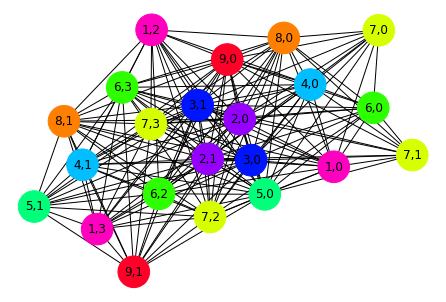

In [761]:
G = nx.Graph()
G.add_nodes_from(Nodeslist)
G.add_edges_from(Edgeslist)

val_map = {'1': 2.0,
           '2': 1.8,
           '3': 1.6,
           '4': 1.4,
           '5': 1.2,
           '6': 1.0,
           '7': 0.8,
           '8': 0.6,
           '9': 0.4,}

values = [val_map.get(node[0], 0) for node in G.nodes()] # set of trees index
pos = nx.spring_layout(G)
nx.draw(G, cmap=plt.get_cmap('gist_rainbow', 50), node_color=values, with_labels=True, font_color='black', node_size=1000, pos=pos)
plt.savefig('test1.png', dpi = 1000)
plt.show()


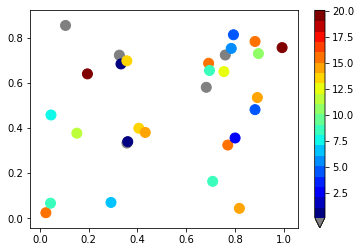

In [451]:
import matplotlib.pyplot as plt
import numpy as np

# Generate some data
x, y, z = np.random.random((3, 30))
z = z * 20 + 0.1

# Set some values in z to 0...
z[:5] = 0

cmap = plt.get_cmap('jet', 20)
cmap.set_under('gray')

fig, ax = plt.subplots()
cax = ax.scatter(x, y, c=z, s=100, cmap=cmap, vmin=0.1, vmax=z.max())
fig.colorbar(cax, extend='min')

plt.show()

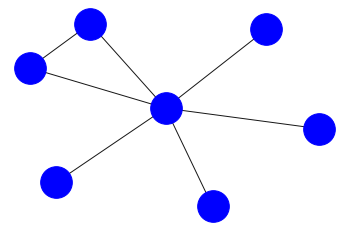

In [478]:
g = nx.Graph()
edge = [('1, 0', '2, 1'), ('2, 1', '3, 1'), ('1, 0', '2, 1'), ('1, 0', '3, 1'), ('1, 0', '4, 1'), ('1, 0', '4, 1'), ('1, 0', '5, 1'), ('1, 0', '5, 1'), ('1, 0', '6, 2'), ('1, 0', '6, 1')]
g.add_edges_from(edge)
nodes = g.nodes()
#for node in nodes


pos = nx.spring_layout(g)
ec = nx.draw_networkx_edges(g, pos, alpha=0.9)
nc = nx.draw_networkx_nodes(g, pos, nodelist=nodes, node_color='blue', font_color='white', with_labels=True, node_size=1000, cmap=plt.get_cmap('viridis'))
#plt.colorbar(nc)
plt.axis('off')
plt.show()


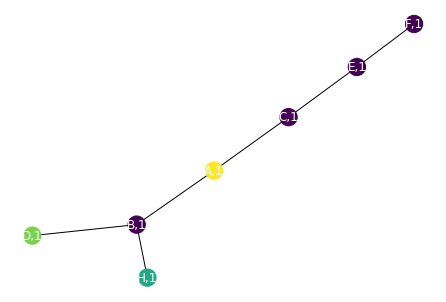

In [501]:
G = nx.Graph()
edge = [('A,1', 'B,1'), ('A,1', 'C,1'), ('D,1', 'B,1'), ('E,1', 'C,1'), ('E,1', 'F,1'), ('B,1', 'H,1')]
G.add_edges_from(edge)

val_map = {'A,1'[0]: 1.0,
           'D,1'[0]: 0.8,
           'H,1'[0]: 0.6}

values = [val_map.get(node[0], 0) for node in G.nodes()] # set of trees index

nx.draw(G, cmap=plt.get_cmap('viridis'), node_color=values, with_labels=True, font_color='white')
plt.show()

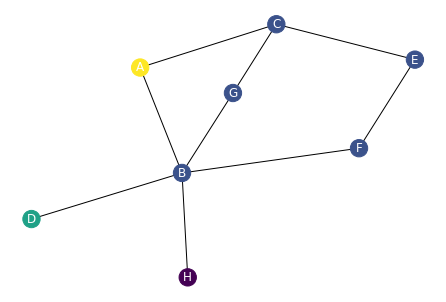

In [369]:
G = nx.Graph()

G.add_edges_from(
    [('A', 'B'), ('A', 'C'), ('D', 'B'), ('E', 'C'), ('E', 'F'),
     ('B', 'H'), ('B', 'G'), ('B', 'F'), ('C', 'G')])

val_map = {'A': 1.0,
           'D': 0.5714285714285714,
           'H': 0.0}

values = [val_map.get(node, 0.25) for node in G.nodes()]

nx.draw(G, cmap=plt.get_cmap('viridis'), node_color=values, with_labels=True, font_color='white')
plt.show()

# <span style='background :yellow' > <span style='color:black'> <span style='font-family:Georgia'>Get max weigt clique of size k' with Gurobi </span>

In [35]:
start_time = time.time()

In [36]:
Edges = copy(Edges_Sub[7])
Nodes = copy(Vertices_Sub[7])
Nodeslist = [str(Nodes[i][1]) + ',' + str(Nodes[i][2]) for i in range(len(Nodes))]
Edgeslist = [(str(Edges[i][1]) + ',' + str(Edges[i][2]), str(Edges[i][3]) + ',' + str(Edges[i][4])) for i in range(len(Edges))]


In [37]:
from gurobipy import *

In [38]:
G = nx.Graph()
G.add_nodes_from(Nodeslist)
G.add_edges_from(Edgeslist)
SubGraph_0_complement_EdgesList = list(nx.complement(G).edges())
SubGraph_0_complement_NodesList = list(nx.complement(G).nodes())

In [39]:
len(SubGraph_0_complement_EdgesList)

5688

In [40]:
 # Create optimization model
m = Model("Max Weight Clique Problem")

In [41]:
m = Model()
x = m.addVars(SubGraph_0_complement_NodesList, vtype=GRB.BINARY, name = "x")
LeafValue = {SubGraph_0_complement_NodesList[i] : Nodes[i][3] for i in range(len(Nodes))}
LeafValue
m.update()
m.getVars()

[<gurobi.Var x[1,0]>,
 <gurobi.Var x[1,1]>,
 <gurobi.Var x[1,2]>,
 <gurobi.Var x[1,3]>,
 <gurobi.Var x[1,4]>,
 <gurobi.Var x[1,5]>,
 <gurobi.Var x[1,6]>,
 <gurobi.Var x[1,7]>,
 <gurobi.Var x[1,45]>,
 <gurobi.Var x[1,46]>,
 <gurobi.Var x[1,47]>,
 <gurobi.Var x[1,48]>,
 <gurobi.Var x[1,49]>,
 <gurobi.Var x[1,50]>,
 <gurobi.Var x[1,52]>,
 <gurobi.Var x[1,53]>,
 <gurobi.Var x[2,5]>,
 <gurobi.Var x[2,8]>,
 <gurobi.Var x[2,9]>,
 <gurobi.Var x[2,10]>,
 <gurobi.Var x[2,11]>,
 <gurobi.Var x[2,12]>,
 <gurobi.Var x[2,13]>,
 <gurobi.Var x[2,14]>,
 <gurobi.Var x[2,15]>,
 <gurobi.Var x[2,16]>,
 <gurobi.Var x[2,25]>,
 <gurobi.Var x[3,0]>,
 <gurobi.Var x[3,1]>,
 <gurobi.Var x[3,2]>,
 <gurobi.Var x[3,3]>,
 <gurobi.Var x[3,4]>,
 <gurobi.Var x[3,5]>,
 <gurobi.Var x[3,6]>,
 <gurobi.Var x[4,0]>,
 <gurobi.Var x[4,1]>,
 <gurobi.Var x[4,2]>,
 <gurobi.Var x[4,3]>,
 <gurobi.Var x[4,4]>,
 <gurobi.Var x[4,5]>,
 <gurobi.Var x[4,6]>,
 <gurobi.Var x[4,7]>,
 <gurobi.Var x[4,8]>,
 <gurobi.Var x[4,11]>,
 <gurobi.Var x[

In [42]:
# Create constraints 1 - only one node from each edge ccan be selected
for i in range(len(SubGraph_0_complement_EdgesList)): 
    m.addConstr(x[SubGraph_0_complement_EdgesList[i][0]] + x[SubGraph_0_complement_EdgesList[i][1]] <= 1)

# Create constraints 2 - only one leaf ccan be selected into the max clique
trees = set(np.array(Vertices_Sub[0], dtype = object)[:,1]) # sub trees in sub graph
for t in trees:
    leaves = []
    for leaf in SubGraph_0_complement_NodesList:
        
        if leaf.split(',')[0] == str(t):
            leaves.append(leaf)
    
    m.addConstr(quicksum(x[l] for l in leaves) == 1)
#    m.addConstr(quicksum(x[leaf] for leaf in SubGraph_0_complement_NodesList if leaf.split(',')[0] == 'i'), GRB.EQUAL, 1)

m.update()
m.getConstrs()   

[<gurobi.Constr R0>,
 <gurobi.Constr R1>,
 <gurobi.Constr R2>,
 <gurobi.Constr R3>,
 <gurobi.Constr R4>,
 <gurobi.Constr R5>,
 <gurobi.Constr R6>,
 <gurobi.Constr R7>,
 <gurobi.Constr R8>,
 <gurobi.Constr R9>,
 <gurobi.Constr R10>,
 <gurobi.Constr R11>,
 <gurobi.Constr R12>,
 <gurobi.Constr R13>,
 <gurobi.Constr R14>,
 <gurobi.Constr R15>,
 <gurobi.Constr R16>,
 <gurobi.Constr R17>,
 <gurobi.Constr R18>,
 <gurobi.Constr R19>,
 <gurobi.Constr R20>,
 <gurobi.Constr R21>,
 <gurobi.Constr R22>,
 <gurobi.Constr R23>,
 <gurobi.Constr R24>,
 <gurobi.Constr R25>,
 <gurobi.Constr R26>,
 <gurobi.Constr R27>,
 <gurobi.Constr R28>,
 <gurobi.Constr R29>,
 <gurobi.Constr R30>,
 <gurobi.Constr R31>,
 <gurobi.Constr R32>,
 <gurobi.Constr R33>,
 <gurobi.Constr R34>,
 <gurobi.Constr R35>,
 <gurobi.Constr R36>,
 <gurobi.Constr R37>,
 <gurobi.Constr R38>,
 <gurobi.Constr R39>,
 <gurobi.Constr R40>,
 <gurobi.Constr R41>,
 <gurobi.Constr R42>,
 <gurobi.Constr R43>,
 <gurobi.Constr R44>,
 <gurobi.Constr R45>

In [43]:
# Create objective function
Objective = quicksum(LeafValue[leaf] * x[leaf] for leaf in SubGraph_0_complement_NodesList)
m.setObjective(Objective, GRB.MAXIMIZE)

In [44]:
m.write('test_sub_Tree10_Depth9_Leaf0_0.lp')

In [45]:
m.optimize()

Optimize a model with 5697 rows, 153 columns and 11529 nonzeros
Variable types: 0 continuous, 153 integer (153 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [3e+00, 8e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Found heuristic solution: objective 45.5175000
Presolve removed 5293 rows and 16 columns
Presolve time: 0.07s
Presolved: 404 rows, 137 columns, 4921 nonzeros
Found heuristic solution: objective 55.3446000
Variable types: 0 continuous, 137 integer (137 binary)

Root relaxation: objective 5.817890e+01, 65 iterations, 0.01 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

*    0     0               0      58.1789000   58.17890  0.00%     -    0s

Explored 0 nodes (65 simplex iterations) in 0.11 seconds
Thread count was 8 (of 8 available processors)

Solution count 3: 58.1789 55.3446 46.5175 

Optimal soluti

In [46]:
v = m.getVars()
v

[<gurobi.Var x[1,0] (value 0.0)>,
 <gurobi.Var x[1,1] (value 1.0)>,
 <gurobi.Var x[1,2] (value -0.0)>,
 <gurobi.Var x[1,3] (value 0.0)>,
 <gurobi.Var x[1,4] (value -0.0)>,
 <gurobi.Var x[1,5] (value 0.0)>,
 <gurobi.Var x[1,6] (value -0.0)>,
 <gurobi.Var x[1,7] (value -0.0)>,
 <gurobi.Var x[1,45] (value -0.0)>,
 <gurobi.Var x[1,46] (value 0.0)>,
 <gurobi.Var x[1,47] (value -0.0)>,
 <gurobi.Var x[1,48] (value -0.0)>,
 <gurobi.Var x[1,49] (value -0.0)>,
 <gurobi.Var x[1,50] (value -0.0)>,
 <gurobi.Var x[1,52] (value 0.0)>,
 <gurobi.Var x[1,53] (value -0.0)>,
 <gurobi.Var x[2,5] (value 0.0)>,
 <gurobi.Var x[2,8] (value -0.0)>,
 <gurobi.Var x[2,9] (value 0.0)>,
 <gurobi.Var x[2,10] (value -0.0)>,
 <gurobi.Var x[2,11] (value 0.0)>,
 <gurobi.Var x[2,12] (value -0.0)>,
 <gurobi.Var x[2,13] (value -0.0)>,
 <gurobi.Var x[2,14] (value 0.0)>,
 <gurobi.Var x[2,15] (value 1.0)>,
 <gurobi.Var x[2,16] (value 0.0)>,
 <gurobi.Var x[2,25] (value 0.0)>,
 <gurobi.Var x[3,0] (value 0.0)>,
 <gurobi.Var x[3,1

In [47]:
print("--- %s seconds ---" % (time.time() - start_time))

--- 0.3837721347808838 seconds ---


In [48]:
# NumberOfLeafInMainTree = np.unique(SplitData[2][np.where((SplitData[1] == 0))])
# for i in NumberOfLeafInMainTree:
#     Edges = copy(Edges_Sub[i])
#     Nodes = copy(Vertices_Sub[i])
#     Nodeslist = [str(Nodes[m][1]) + ',' + str(Nodes[m][2]) for m in range(len(Nodes))]
#     Edgeslist = [(str(Edges[m][1]) + ',' + str(Edges[m][2]), str(Edges[m][3]) + ',' + str(Edges[m][4])) for m in range(len(Edges))]

#     G = nx.Graph()
#     G.add_nodes_from(Nodeslist)
#     G.add_edges_from(Edgeslist)
    
#     SubGraph_complement_EdgesList = list(nx.complement(G).edges())
#     SubGraph_complement_NodesList = list(nx.complement(G).nodes())

#     m = Model()
#     y = m.addVars(SubGraph_complement_NodesList, vtype=GRB.BINARY, name="x")
#     LeafValue = {SubGraph_complement_NodesList[j] : Nodes[j][3] for j in range(len(Nodes))}
    
#     # Create constraints 1 - only one node from each edge ccan be selected
#     for k in range(len(SubGraph_complement_EdgesList)): 
#         m.addConstr(y[SubGraph_complement_EdgesList[k][0]] + y[SubGraph_complement_EdgesList[k][1]] <= 1)

#     # Create constraints 2 - only one leaf ccan be selected into the max clique
#     for t in trees:
#         m.addConstr(sum(y[leaf] for leaf in SubGraph_complement_NodesList if leaf.split(',')[0] == t) == 1)

#     Objective = quicksum(LeafValue[leaf] * y[leaf] for leaf in SubGraph_0_complement_NodesList)
#     m.setObjective(Objective, GRB.MAXIMIZE)
    
#     m.update()
#     m.optimize()
#     print ()


In [49]:
# Edges = copy(Edges_Sub[7])
# Nodes = copy(Vertices_Sub[7])
# Nodeslist = [str(Nodes[m][1]) + ',' + str(Nodes[m][2]) for m in range(len(Nodes))]
# Edgeslist = [(str(Edges[m][1]) + ',' + str(Edges[m][2]), str(Edges[m][3]) + ',' + str(Edges[m][4])) for m in range(len(Edges))]

# G = nx.Graph()
# G.add_nodes_from(Nodeslist)
# G.add_edges_from(Edgeslist)

# SubGraph_complement_EdgesList = list(nx.complement(G).edges())
# SubGraph_complement_NodesList = list(nx.complement(G).nodes())

# m = Model()
# y = m.addVars(SubGraph_complement_NodesList, vtype=GRB.BINARY, name="x")
# LeafValue = {SubGraph_complement_NodesList[j] : Nodes[j][3] for j in range(len(Nodes))}
# LeafValue